Step 1. Study the materials of lectures and practical classes on the topics of section 4.

Step 2:
Formulate and test hypotheses related to the given dataset. Example hypotheses could include:

H0 (Null Hypothesis): There is no significant relationship between height and weight.
H1 (Alternative Hypothesis): There is a significant relationship between height and weigh
The dataset contains the following attributes:

Gender: Categorical variable indicating the gender of individuals.
Height: Continuous variable representing the height of individuals.
Weight: Continuous variable representing the weight of individuals.

Step 3.

Check for normality of distribution for both the height and weight variables. You can use:

Shapiro-Wilk Test
Histogram with a normal curve overlay(kde)

Step 4.
Perform a correlation analysis between height and weight to determine the strength and direction of their relationship.

Calculate Pearson or Spearman correlation coefficient.
Visualize the correlation using a scatter plot with a fitted regression line


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#load our dataset
wieght_height_df = pd.read_csv('/content/weightheight.csv')

wieght_height_df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


step 2
1.Formulate and test hypotheses related to the given dataset. Example hypotheses could include:

H0 (Null Hypothesis): There is no significant relationship between height and weight. H1 (Alternative Hypothesis): There is a significant relationship between height and weigh The dataset contains the following attribute

In [ ]:
#testing the hypothesis-we do the pearson correlation test to assess the linear relationship between our 2 variables(wieght ,height)
correlation = wieght_height_df['Height'].corr(wieght_height_df['Weight'], method='pearson')
print('Pearson Correlation:', correlation)

#get the p_value
t_stat, p_value = stats.ttest_ind( wieght_height_df['Height'],  wieght_height_df['Weight'])
print('P-value:', p_value)


Pearson Correlation: 0.9247562987409146
P-value: 0.0


intergetion:

The Pearson correlation of 0.92 indicates a strong, positive linear relationship between height and weight.
The p-value of 0.0 provides strong evidence to reject the null hypothesis and conclude that this relationship is statistically significant.

In [ ]:
# formulating our hypothesis based on gender(categorical)
#geting the data for male and female
male_df = wieght_height_df[wieght_height_df['Gender'] == 'Male']
female_df = wieght_height_df[wieght_height_df['Gender'] == 'Female']

#calculate the correlation for males
correlation_male = male_df['Height'].corr(male_df['Weight'], method='pearson')
print('Pearson Correlation for Males:', correlation_male)

#calculate the correlation for females
correlation_female = female_df['Height'].corr(female_df['Weight'], method='pearson')
print('Pearson Correlation for Females:', correlation_female)

Pearson Correlation for Males: 0.8629788486163172
Pearson Correlation for Females: 0.8496085914186009


Step 3.

Check for normality of distribution for both the height and weight variables. You can use:

Shapiro-Wilk Test Histogram with a normal curve overlay(kde)

In [ ]:
from scipy.stats import shapiro

In [ ]:
#Check for normality of distribution
print("\nNormality Test(Shapiro-Wilk):")
stat_a,p_a=shapiro(wieght_height_df['Height'])
stat_b,p_b=shapiro(wieght_height_df['Weight'])

print(shapiro(wieght_height_df['Height']))
print(shapiro(wieght_height_df['Weight']))


Normality Test(Shapiro-Wilk):
ShapiroResult(statistic=np.float64(0.9960623238931016), pvalue=np.float64(8.162481039405506e-16))
ShapiroResult(statistic=np.float64(0.9862472142251519), pvalue=np.float64(5.557950841845519e-30))


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


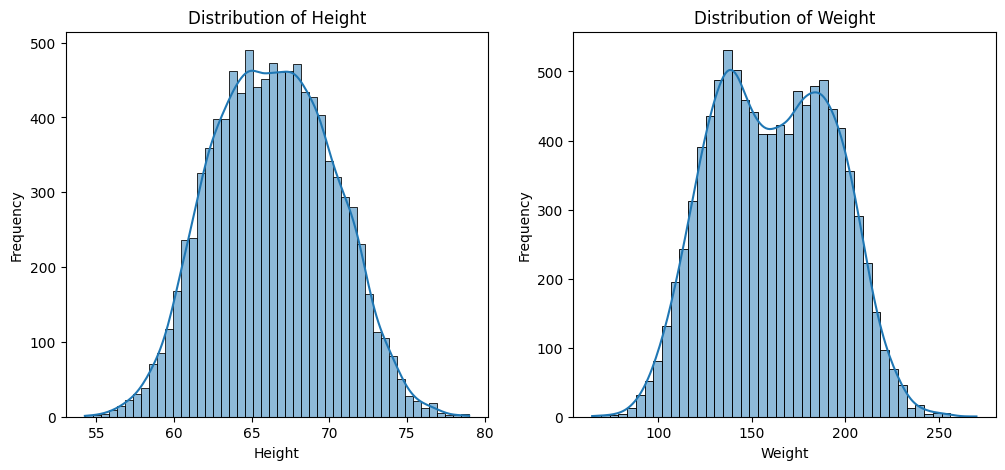

In [ ]:
# Create subplots  visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Height
sns.histplot(wieght_height_df['Height'], kde=True, ax=axes[0])  # kde=True adds a kernel density estimate curve
axes[0].set_title('Distribution of Height')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Frequency')

# Histogram for Weight
sns.histplot(wieght_height_df['Weight'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Weight')
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('Frequency')


plt.show()

Step 4. Perform a correlation analysis between height and weight to determine the strength and direction of their relationship.

Calculate Pearson or Spearman correlation coefficient. Visualize the correlation using a scatter plot with a fitted regression line

In [ ]:
#creating correlation matrix for numerical cols
numerical_cols=['Height','Weight']
corr_matrix=wieght_height_df[numerical_cols].corr()
corr_matrix

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


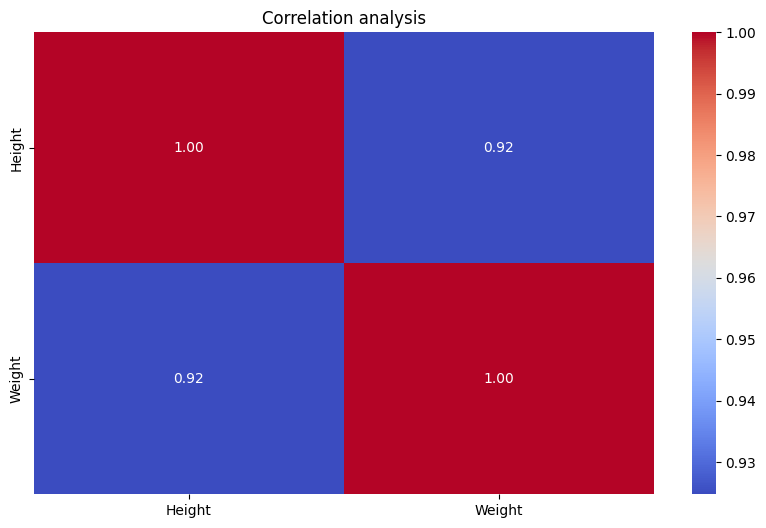

In [ ]:
#performing a correlation analysis between height and weight
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation analysis')
plt.show()

Pearson Correlation: 0.9247562987409146


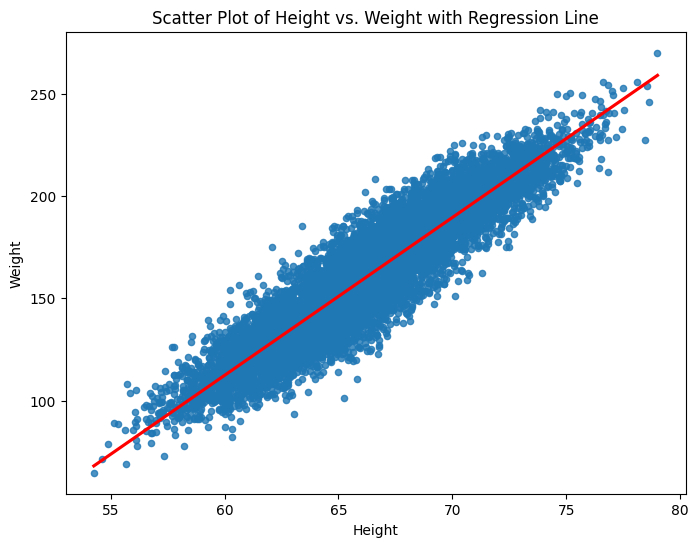

In [ ]:
#Calculate Pearson . Visualize the correlation using a scatter plot with a fitted regression line
# Calculate Pearson correlation coefficient
correlation = wieght_height_df['Height'].corr(wieght_height_df['Weight'], method='pearson')
print('Pearson Correlation:', correlation)

# Visualize the correlation using a scatter plot with a fitted regression line
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
sns.regplot(x='Height', y='Weight', data=wieght_height_df, scatter_kws={'s': 20}, line_kws={'color': 'red'})  # s: marker size
plt.title('Scatter Plot of Height vs. Weight with Regression Line')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()